# Spaceship Titanic

# I. Executive Summary

The aim of this project is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly.

Dataset is from the following link:

https://www.kaggle.com/competitions/spaceship-titanic/data

The project starts by reading train and test data. We found that there were 8693 rows and 14 features provided for train data and 4277 rows and 13 features provided for test data. The train data has one target feature "Transported" apart from test data. Further analysis was performed for the "Transported" feature to check if the values are equally distributed. Train and test data are combined for the data cleaning process. The features 'PassengerId' and 'Name' doesn't impact to provide any effect on the person being transported or not, so are dropped from the dataset. The features are classified into numerical and categorical to perform analysis and check variable distributions.

The following steps are performed on features to clean the dataset:
- Locating missing values in each column
- Replacing missing values on numerical feature data with mean and categorical feature data with mode
- Standardization of Numerical Continuous features to bring data to a similar scale
- The categorical features contained either boolean or non-boolean data types. Features with boolean categorical features that contain information in their ordering set were converted to integers using a label encoder, whereas columns with non-boolean categorical features were transposed using dummy variables.
- Separation of train and test data for model fitting and prediction

The train data is then split into 80% train and 20% test which will help to check how a model would perform on new data.

The Sequential forward feature selection wrapper method provided by the scikit-learn library is used for the feature selection. The parameters of the Sequential forward feature selection used are accuracy and cross validation to determine the ideal number of features to keep in all the 3 models. This is a binary classification problem, so three methods are implemented for model training: Linear Discriminant Analysis, Gaussian Naive Bayes Classifier, and Logistic Regression.

The Logistic Regression model combined with sequential forward feature selection performed the best out of all the classification models used to carry out this binary classification task  resulting in the best submission score of 0.78512 on Kaggle.

Kaggle Score with Linear Discriminant Analysis:

SCORE = 0.76128

Kaggle Score with Gaussian Naive Bayes Classifier:

SCORE = 0.75637




## Best Kaggle Score

- Logistic Regression
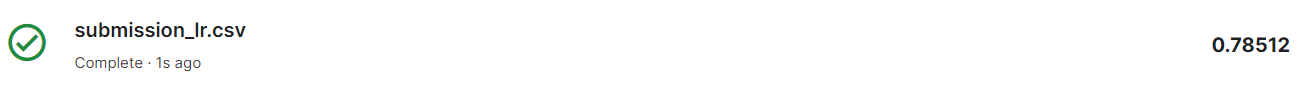

# II. Ethics Discussion

The main objective of this Kaggle challenge raises ethical concerns due to the use of a machine learning algorithm, even though this is a fictional dataset. If colliding of the spaceship titanic with a spacetime anomaly hidden within a dust cloud problem existed, it would be wrong to use a machine learning algorithm to depict who was transported.

The names of people on the ship's passengers were included in this dataset. Although this data is fictitious, in real-world scenarios, data must be anonymized to protect passengers’ security and privacy. Therefore, the Name column is removed from the final dataset as it doesn't make it relevant to include it in the final dataset.

The bias is introduced during the treatment of missing values so the model will never be perfect. Most of the causes of such missing values are unknown. A variety of imputation techniques were used to fill in the gaps in almost all of the dataset's missing values. The use of machine learning to solve this spaceship titanic kaggle issue will have substantial ethical consequences because it will ultimately determine who was transported to an alternate dimension.

The data is retrieved from the spaceship's damaged computer system, so it might be possible that the majority of the data files might have been lost which would have been important for the influence of whether the individual was transported or not. The dataset which we are working on might be biased or not be sufficient to solve the problem.

In spite of the fact that this dataset is fictional, the models and training techniques presented are only intended for use in learning data science, and related topics, not for making predictions about whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision.






# III. Detailed Report

## Import Libraries and Upload Files

In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn import metrics
from sklearn.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
# Upload files to notebook

from google.colab import files
uploaded = files.upload()

# Note : Upload train.csv, test.csv from local directory

Saving test.csv to test.csv
Saving train.csv to train.csv


## Loading Dataset

The analysis begins by loading the test and train data, after which the target feature "Transported" in the training data is checked for class balance for further analysis. Dropping the feature "Transported" from train data and storing in the variable Y_train_data. After that, combining of train and test data is done.
We found that there are 8693 instances of train data and 4277 instances of test data.

In [ ]:
# Read .csv files for train and test data

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

print(f"The (rows, features) of Train data are {train_data.shape}, & (rows, features) of Test data are {test_data.shape}")

The (rows, features) of Train data are (8693, 14), & (rows, features) of Test data are (4277, 13)


Separate train dataset is being copied and saved into "train_separate" variable for analysis during categorical features with target variable.

In [ ]:
# Copy train data
id = test_data["PassengerId"]
train_separate = train_data.copy()

The following pie plot for Transported feature in the training dataset indicates that the calsses are balanced with respect to the target feature "Transported"

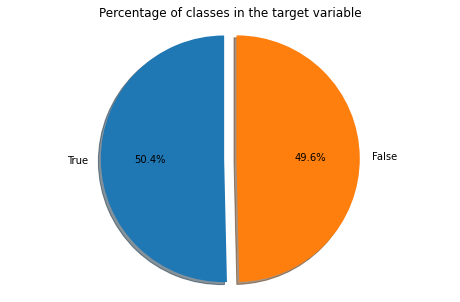

In [ ]:
target = train_data.Transported.value_counts()
labels, sizes = target.index, target.to_list()
explode = (0.1, 0)

plt.figure(figsize=(8, 5))
plt.pie(sizes, explode=explode, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Percentage of classes in the target variable')
plt.show()

In [ ]:
# Dropping transported column from train_data and storing in Y_train data variable

Y_train_data = train_data['Transported']
train_data.drop('Transported', axis=1, inplace=True)

In [ ]:
# Combine train and test data

data = pd.concat([train_data, test_data], axis=0, ignore_index=True)

print("The table showing first five rows and last five rows of dataset \
to ensure that dataset is properly combined:")
data

The table showing first five rows and last five rows of dataset to ensure that dataset is properly combined:


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


## Explore Data

Observing the dataset, the features 'PassengerId' and 'Name' doesn't seem to provide any effect to the person being transported or not. So, both the features are dropped.

In [ ]:
# Dropping features "PassengerId" and "Name"

data = data.drop(['PassengerId', 'Name'], axis =1)
print("Checking the head of dataset to verify the features \"PassengerId\" and \"Name\" are dropped: ")
data.head()

Checking the head of dataset to verify the features "PassengerId" and "Name" are dropped: 


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0


The feature "Cabin" is divided into three sections namely, deck/num/side, where side can be either P for Port or S for Starboard. The objective is to remove side data from "Cabin" feature as it provides valuable information about the side of the traveller. The other two sections "deck" and "num" are removed as they didn't provide any valuable information and not having any effect on passenger of being transported.

In [ ]:
# Splitting feature "Cabin" into "Deck", "Cabin" and "Side"
data[["Deck", "Cabin", "Side"]] = data.Cabin.str.split("/", expand = True)

# Dropping "Deck" and "Cabin" column
data = data.drop(["Deck", "Cabin"], axis = 1)

# Splitting feature "Cabin" into "Deck", "Cabin" and "Side" is carried out on separate training data
train_separate[["Deck", "Cabin", "Side"]] = train_separate.Cabin.str.split("/", expand = True)

# Dropping "Deck" and "Cabin" column from train_separate dataset
train_separate = train_separate.drop(["Deck", "Cabin"], axis = 1)

print("Checking the head of dataset to verify the columns \"Deck\" and \"Cabin\" are dropped: ")
data.head()

Checking the head of dataset to verify the columns "Deck" and "Cabin" are dropped: 


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,S


In [ ]:
# Get information on the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12682 non-null  object 
 1   CryoSleep     12660 non-null  object 
 2   Destination   12696 non-null  object 
 3   Age           12700 non-null  float64
 4   VIP           12674 non-null  object 
 5   RoomService   12707 non-null  float64
 6   FoodCourt     12681 non-null  float64
 7   ShoppingMall  12664 non-null  float64
 8   Spa           12686 non-null  float64
 9   VRDeck        12702 non-null  float64
 10  Side          12671 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.1+ MB


In [ ]:
# Identification of features into Numerical and Categorical

print('Feature', 'Type'.rjust(28, ' '))
print('-'*36)
for variable in data.columns:
  if data[variable].dtype == 'float64':
    target = 'Numerical'
  else:
    target = 'Categorical'
  print(variable, target.rjust(36 - len(variable), '-'))


Feature                         Type
------------------------------------
HomePlanet ---------------Categorical
CryoSleep ----------------Categorical
Destination --------------Categorical
Age ------------------------Numerical
VIP ----------------------Categorical
RoomService ----------------Numerical
FoodCourt ------------------Numerical
ShoppingMall ---------------Numerical
Spa ------------------------Numerical
VRDeck ---------------------Numerical
Side ---------------------Categorical


### Numerical Features

There are 6 numerical features identified, now checking the distribution of numerical features by histogram is carried out.

Numerical features - [Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck]

The below description on numerical features indicated that all the features provided are continuous.

In [ ]:
# Description of all numeric features
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


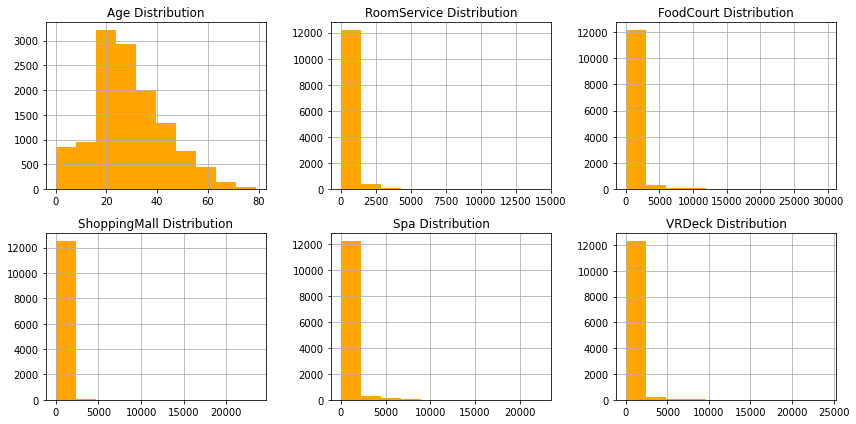

In [ ]:
# Check distributions of numerical features
def draw_histograms(df, variables, n_rows, n_cols, color):
    fig=plt.figure()
    for index, var_name in enumerate(variables):
        axes=fig.add_subplot(n_rows,n_cols,index+1)
        df[var_name].hist(bins=10, ax=axes, figsize=(12, 6), color=color)
        axes.set_title(var_name +" Distribution")
    fig.tight_layout()  # Improves appearance a bit
    plt.show()

numerical_data = data[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]]
draw_histograms(data, numerical_data.columns, 2, 3, "orange")

As we can see from the histogram distribution, the features referring to the expenses on deck are strongly skewed to the right. So there are a lot of 0 or low expenses. Since these features represents strictly positive amounts, we can log-transform them to get a better overview of possible differences.

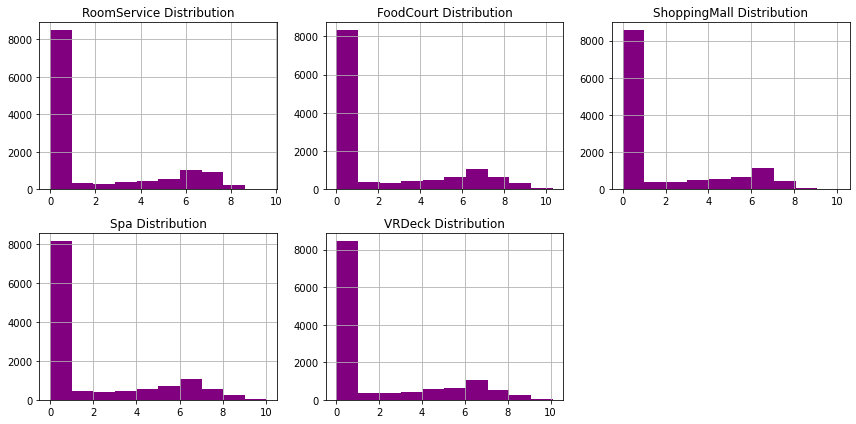

In [ ]:
# Log-transform data and plot histogram
log_train = data.copy()
log_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

log_train[log_features] = log_train[log_features].apply(lambda col: np.log(col+1), raw=True, axis=1)
log_features = log_train[log_features]
draw_histograms(log_train, log_features.columns, 2, 3, "purple")

After observation from the above figure of distribution of histogram of log scales on features related to expenses, it was observed that although some of the data showed positive trend in the distribution but didn't make any difference so it was decided by both team members to leave the data to its given way.

### Categorical Features

There are 5 categorical features identified

Categorical features - [HomePlanet, CryoSleep, Destination, VIP, Side]

The below description on categorical features showed that it contained either boolean or non-boolean data type columns.

In [ ]:
# Description of Categorical Features
data.describe(include=[object])

,HomePlanet,CryoSleep,Destination,VIP,Side
count,12682,12660,12696,12674,12671
unique,3,2,3,2,2
top,Earth,False,TRAPPIST-1e,False,S
freq,6865,8079,8871,12401,6381


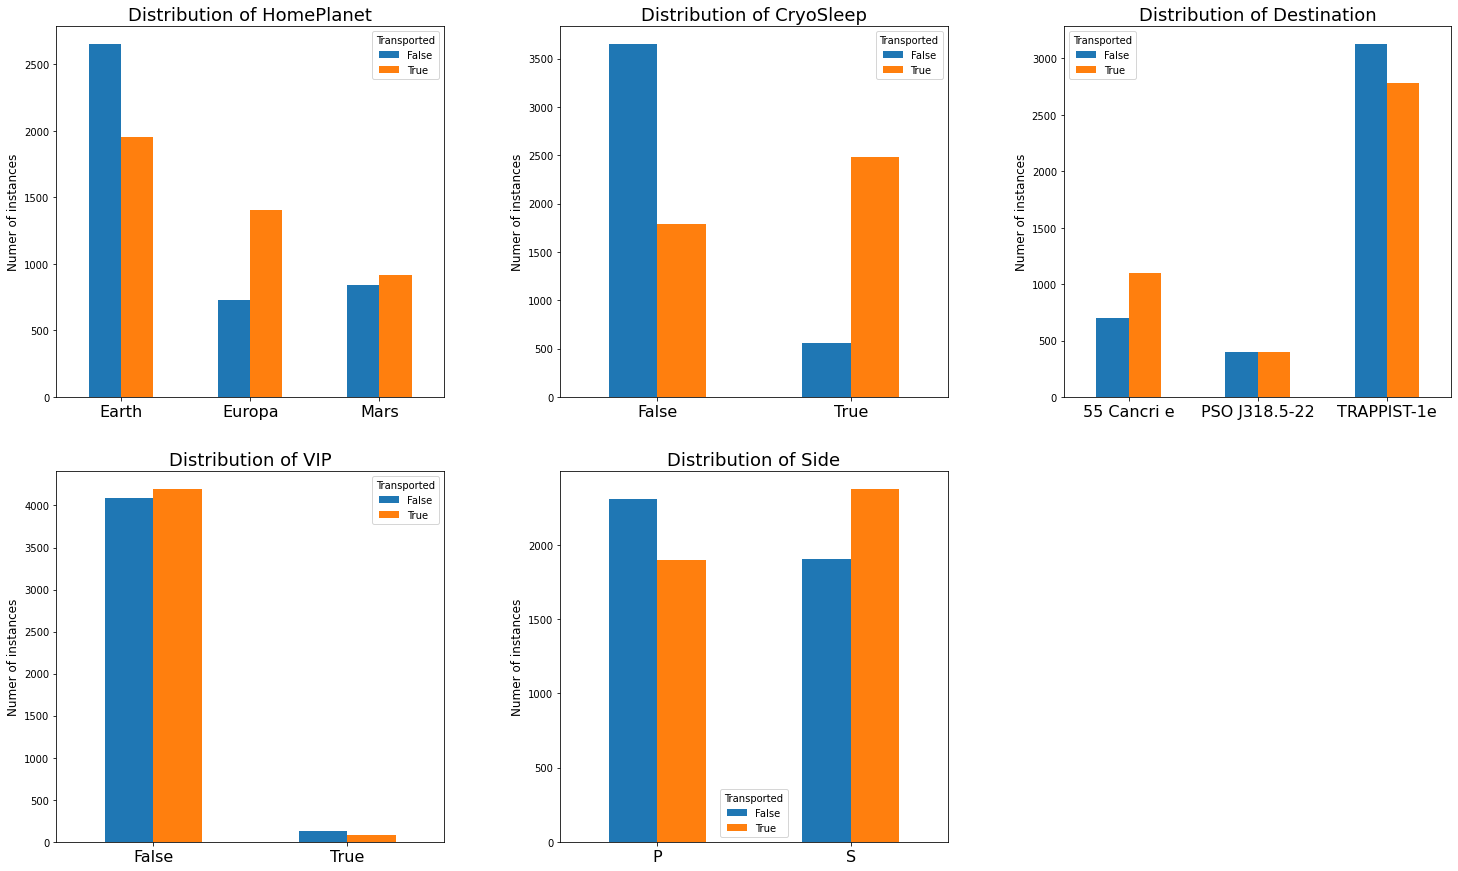

In [ ]:
# Check distributions of categorical features
categorical_data = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Side']
plt.figure(figsize=(25,15))

for index, feature in enumerate(categorical_data):
    plt.subplot(2,3,index+1)
    train_separate.groupby(feature)["Transported"].value_counts().unstack().plot(kind="bar", rot=0, ax=plt.gca())
    plt.title("Distribution of "+ feature, fontsize=18)
    plt.xlabel("")
    plt.ylabel("Numer of instances", fontsize=12)
    plt.xticks(fontsize=16)

plt.subplots_adjust(wspace=0.3)



The HomePlanet feature shows that most of the passengers came from Earth and that passengers from Europa and Mars were more likely to be transported.

For the CryoSleep feature, we can see an interesting relationship of a very high percentage of passengers who chose to be in CryoSleep during the journey were transported.

We can see that the VIP status was very small and only a minimal percentage of passengers were VIPs.

For the Side feature, there was almost equal distribution between Port and Starboard. Although, passengers with Starboard seem to be likely transported compared to that of Port.


## Data Preprocessing

- Locating missing values
- Filling missing values on dataset
- Standardization of Numerical Continuous features
- Converting boolean categorical features using a label encoder and non-boolean categorical features using dummy variables
- Dividing train and test data


In [ ]:
# Check for number of missing values in each feature
print("Number of missing values in each feature: ")
data.isna().sum()

Number of missing values in each feature: 


HomePlanet      288
CryoSleep       310
Destination     274
Age             270
VIP             296
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
Side            299
dtype: int64

The below plot shows that all features have missing values. The range of missing values tends to be in between 250 to 300. The missing values in numerical features have been replaced with mean and missing values in categorical features have been replaced with mode.

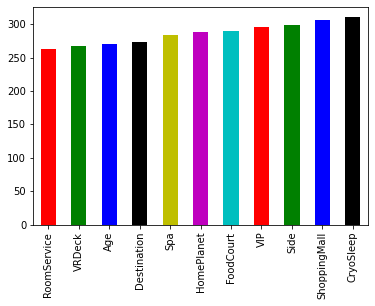

In [ ]:
# Plot for missing values in each feature
data.isna().sum().sort_values().plot(kind="bar", color=list('rgbkymc'))
plt.show()

In [ ]:
# Missing features in numerical features are replaced with mean and in categorical features are replaced with mode
for feature in data.columns:
  if data[feature].dtype == 'object':
      data[feature]= data[feature].fillna(data[feature].mode()[0])
  else:
      data[feature] = data[feature].fillna(data[feature].mean())

print("Number of missing values in each feature: ")
data.isna().sum()

Number of missing values in each feature: 


HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Side            0
dtype: int64

### Standardization of Continuous Features and Dummy Encoding

Features of numerical data tend to have large differences between their ranges, we want to bring all the numerical features to a similar scale. Standard Scaler is performed on numerical features. Dummy encoding has been performed on non-boolean categorical features namely, "HomePlanet", "Destination" and "Side" to bring variables to numerical scale.

In [ ]:
# Perform standard scaler for numerical features
numerical_data = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
scaler = StandardScaler()

for index in numerical_data:
  data[index] = scaler.fit_transform(data[[index]])

data

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Side
0,Europa,False,TRAPPIST-1e,7.184543e-01,False,-0.347750,-0.288506,-0.299739,-0.275970,-0.262708,P
1,Earth,False,TRAPPIST-1e,-3.352005e-01,False,-0.177696,-0.282761,-0.256896,0.215177,-0.225030,S
2,Europa,False,TRAPPIST-1e,2.053084e+00,True,-0.280664,1.994205,-0.299739,5.731407,-0.220749,S
3,Europa,False,TRAPPIST-1e,2.969924e-01,False,-0.347750,0.530487,0.336049,2.702222,-0.097440,S
4,Earth,False,TRAPPIST-1e,-8.971498e-01,False,0.124970,-0.243822,-0.040968,0.229491,-0.260996,S
...,...,...,...,...,...,...,...,...,...,...,...
12965,Earth,True,TRAPPIST-1e,3.672360e-01,False,-0.347750,-0.288506,-0.299739,-0.275970,-0.262708,S
12966,Earth,False,TRAPPIST-1e,9.291853e-01,False,-0.347750,0.252170,-0.270606,-0.267024,-0.139399,S
12967,Mars,True,55 Cancri e,-2.495556e-16,False,-0.347750,-0.288506,-0.299739,-0.275970,-0.262708,P
12968,Europa,False,TRAPPIST-1e,-2.495556e-16,False,-0.347750,1.422251,-0.299739,-0.275970,0.185144,P


In [ ]:
# Applying dummy encoding for Categorical Data
categorical_data = ['HomePlanet', 'Destination', 'Side']

def encodefeatureData(feature, data):
  dummyData = pd.get_dummies(data[feature], prefix=feature)
  featureData = pd.concat([data, dummyData], axis=1)
  featureData.drop(feature, axis=1, inplace=True)
  return featureData

for value in categorical_data:
   data = encodefeatureData(value, data)


Boolean categorical features such as "CryoSleep" and "VIP" features tends to be of boolean type, hence label encoder is performed. Encoding converts values to either 0,1.

In [ ]:
categorical_bool = ['CryoSleep','VIP']

# label encoder object
encode = LabelEncoder()

# Assign labels of 0 and 1 to values in column
for feature in categorical_bool:
    data[feature] = encode.fit_transform(data[feature])

print("Dataset head to ensure features are transforemd: ")
data.head()

Dataset head to ensure features are transforemd: 


,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Side_P,Side_S
0,0,0.718454,0,-0.347750,-0.288506,-0.299739,-0.275970,-0.262708,0,1,0,0,0,1,1,0
1,0,-0.335201,0,-0.177696,-0.282761,-0.256896,0.215177,-0.225030,1,0,0,0,0,1,0,1
2,0,2.053084,1,-0.280664,1.994205,-0.299739,5.731407,-0.220749,0,1,0,0,0,1,0,1
3,0,0.296992,0,-0.347750,0.530487,0.336049,2.702222,-0.097440,0,1,0,0,0,1,0,1
4,0,-0.897150,0,0.124970,-0.243822,-0.040968,0.229491,-0.260996,1,0,0,0,0,1,0,1


### Separation of train and test data

In [ ]:
# Reconvert data to train and test
# Separating 8693 instances of train data and 4277 instances of test data

train_set = data.iloc[:8693,:]
print("Train set shape ---> (Rows, Features) : ", train_set.shape)
test_set = data.iloc[8693:,:]
print("Test set shape ---> (Rows, Features) : ", test_set.shape)

Train set shape ---> (Rows, Features) :  (8693, 16)
Test set shape ---> (Rows, Features) :  (4277, 16)


In [ ]:
# Check variable type
data.dtypes

CryoSleep                      int64
Age                          float64
VIP                            int64
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
HomePlanet_Earth               uint8
HomePlanet_Europa              uint8
HomePlanet_Mars                uint8
Destination_55 Cancri e        uint8
Destination_PSO J318.5-22      uint8
Destination_TRAPPIST-1e        uint8
Side_P                         uint8
Side_S                         uint8
dtype: object

## Models

We have split train data considering 80% train and 20% test for modelling. There was no obvious reason to select 20% test, just wanted to make sure that we have enough test data to perform analysis on predicted results. Random State is set at number 42 so that at every run the predicted results will be same. Reason for selecting number 42 is just random and it has nothing to do with any logic.

As this is a classification prolem, model performance is evaluated using the Receiver Operator Characteristic(ROC) curve. The ROC curve plot is performed using code presented in Logistic_Regression_vs_Naive_Bayes_Discriminant_Analysis_on_Titanic.ipynb file. The area under the curve provides a collection measure of performance across all likely classification thresholds and is used to determine how successfully our model have distinguished between classes.

In classification, accuracy can be an inaccurate metric for unbalanced data sets. In this case, although target feature seems to be balanced but to be assured that the model performed well, we performed other metrics such as Precision, and Recall for model evaluation.


In [ ]:
# Split the dataset into training and testing sets, with a ratio of 80% and 20% respectively.
X_train, X_test, y_train, y_test = train_test_split(train_set,
                                                    Y_train_data,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [ ]:
# The ROC curve plot
def plot_ROC_curve(model, Y, preds, color):
  fpr, tpr, threshold = metrics.roc_curve(Y, preds, pos_label=1)
  roc_auc = metrics.auc(fpr, tpr)

  plt.title(model.__class__.__name__ + ' ROC')
  plt.plot(fpr, tpr, color, label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1], "r--")
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

In [ ]:
# Plot Confusion Matrix
def show_confusion_matrix(conf_matrix):
    plt.figure(figsize=(3, 3))
    sns.set(font_scale=0.9)
    sns.heatmap(conf_matrix, annot=True, cbar=False, fmt='.0f',
                xticklabels=('Actual 0s', 'Actual 1s'),
                yticklabels=('Predicted 0s', 'Predicted 1s'))
    sns.set(font_scale=1)

# Model Report for Binary Classification
def getModelReport(model, X_train, y_train, X_test, y_test):
    """
    Returns: 1: prints Accuracy, precision, recall
             2: a plot of the confusion matrix

    """
    preds = model.predict(X_test)
    accuracy = accuracy_score(preds, y_test)
    precision = precision_score(preds, y_test)
    recall = recall_score(preds, y_test)

    # Confusion Matrix
    conf_matrix = confusion_matrix(preds, y_test)

    # Model Class
    model_class = model.__class__.__name__

    print('*'*30)
    print('{}'.format(model_class).rjust(20, ' '))
    print('*'*30)
    print(f'Accuracy: {accuracy} \nPrecision: {precision} \nRecall: {recall} \n')
    print('*'*30)

    show_confusion_matrix(conf_matrix)
    plt.title('Confusion matrix of {}'.format(model_class))
    plt.show()

    return precision, recall

### Linear Discriminant Analysis

#### Sequential Forward Feature Selection for LDA

The forward feature selection for Linear Discriminant Analysis is carried out using Sequential forward Feature Selection library wrapper from scikit-learn. It was found that 8 features were selected after performing wrapper method and scoring was kept as accuracy and cross-validation to 5 while selection of features. The train and test data for LDA were separated based on the feature selected by forward feature selection.

In [ ]:
# Object for LDA Sequential forward feature selection
lda_sfs = SFS(LinearDiscriminantAnalysis(), direction='forward',
            scoring='accuracy',
            cv=5)

# Fit LDA Sequential forward Feature Selection on training data
lda_features = lda_sfs.fit(X_train, y_train)

In [ ]:
# Get indices of features selected for LDA
lda_feature_indices = lda_features.get_support(indices = True)
X_train_lda = X_train.iloc[ : , lda_feature_indices]
X_test_lda = X_test.iloc[ : , lda_feature_indices]

lda_feature_cols = X_train_lda.columns
print(f'Features selected for LDA: {lda_feature_cols}')
test_lda = test_set.iloc[ : , lda_feature_indices]


Features selected for LDA: Index(['CryoSleep', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'HomePlanet_Europa', 'Destination_TRAPPIST-1e'],
      dtype='object')


#### Model Build and Evaluation

The model build process is done with Linear Discriminant Analysis. The features generated by forward feature selection for LDA are used. X_train_lda and X_test_lda dataset are generated considering only the features selected by wrapper. The ROC curve plot was drawn for LDA which is used to determine how successfully our LDA model have distinguished between classes and gave area under the curve(AUC) score of 0.84.

In [ ]:
# LDA Model Fitting
model_LDA = LinearDiscriminantAnalysis().fit(X_train_lda, y_train)

The area under the curve for Linear Discriminant Analysis:  0.8426056738601879



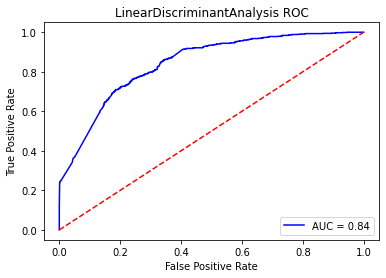

In [ ]:
# Predict probability on test data for LDA
pred_prob_LDA = model_LDA.predict_proba(X_test_lda)
auc_score_LDA = roc_auc_score(y_test, pred_prob_LDA[:,1])
print("The area under the curve for Linear Discriminant Analysis: ", auc_score_LDA, end="\n\n")

# plot ROC curve
plot_ROC_curve(model_LDA, y_test, pred_prob_LDA[:,1], "blue")

******************************
LinearDiscriminantAnalysis
******************************
Accuracy: 0.7596319723979299 
Precision: 0.7004555808656037 
Recall: 0.7987012987012987 

******************************


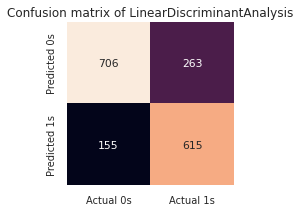

In [ ]:
# Performance Metrics for LDA
precision_LDA, recall_LDA = getModelReport(model_LDA, X_train_lda, y_train, X_test_lda, y_test)

The confusion matrix is drawn for Linear Discriminant Analysis. The matrix is 2 rows and 2 columns. Columns denote Actual values and rows denote predicted values on target feature.

- Accuracy: The model predicted that 76% passengers transported to alternate dimension.

Different Performance metrics used for classification:

- Precision: 70% of the cases that were accurately predicted actually came true.

- Recall: A recall of 0.79 means that every item from class True was labelled as belonging to class True


#### Prediction on final test set for LDA

In [ ]:
# Predict labels on test dataset for kaggle
pred_LDA = model_LDA.predict(test_lda)

In [ ]:
# Prepare .csv file according to kaggle evaluation
final_lda = pd.DataFrame()
final_lda['PassengerId'] = id
final_lda['Transported'] = pred_LDA
final_lda.to_csv('submission_lda.csv', index=False)

Kaggle Submission Score for LDA
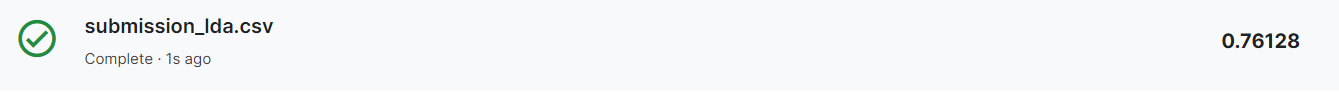

### Naive Bayes Classifier

#### Sequential Forward Feature Selection for Naive Bayes

The forward feature selection for Gaussian Naive Bayes Classifier is carried out using Sequential forward Feature Selection library wrapper from sklearn. It was found that 8 features were selected after performing wrapper method with Gaussian Naive Bayes and scoring was kept as accuracy and and cross-validation to 5 while selection of features. The train and test data for Gaussian Naive Bayes were separated based on the feature selected by forward feature selection.

In [ ]:
# Object for NB Sequential forward feature selection
nb_sfs = SFS(GaussianNB(), direction='forward',
            scoring='accuracy',
            cv=5)

# Fit NB Sequential forward Feature Selection on training data
nb_features = nb_sfs.fit(X_train, y_train)

In [ ]:
# Get indices of features selected for NB
nb_feature_indices = nb_features.get_support(indices = True)
X_train_nb = X_train.iloc[ : , nb_feature_indices]
X_test_nb = X_test.iloc[ : , nb_feature_indices]

nb_feature_cols = X_train_nb.columns
print(f'Features selected for Gaussian NB: {nb_feature_cols}')
test_nb = test_set.iloc[ : , nb_feature_indices]

Features selected for Gaussian NB: Index(['CryoSleep', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'HomePlanet_Mars', 'Destination_PSO J318.5-22', 'Side_P'],
      dtype='object')


#### Model Build

The model build process is done with Gaussian Naive Bayes Classifier. The features generated by forward feature selection for Gaussian NB are used. X_train_nb and X_test_nb dataset are generated considering only the features selected by wrapper and are used for fitting and prediction. The ROC curve plot was drawn for Gaussian Naive Bayes which is used to determine how successfully our Gaussian NB model have distinguished between classes and gave area under the curve(AUC) score of 0.80.

In [ ]:
# Gaussian Naive Bayes Model Fitting
model_NB = GaussianNB().fit(X_train_nb, y_train)

The area under the curve for Gaussian NB:  0.797254609383061



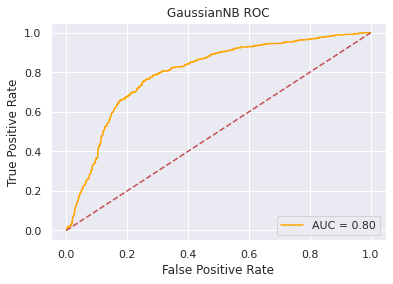

In [ ]:
pred_prob_NB = model_NB.predict_proba(X_test_nb)
auc_score_NB = roc_auc_score(y_test, pred_prob_NB[:,1])
print("The area under the curve for Gaussian NB: ", auc_score_NB, end="\n\n")
plot_ROC_curve(model_NB, y_test, pred_prob_NB[:,1], "orange")

******************************
          GaussianNB
******************************
Accuracy: 0.7441058079355952 
Precision: 0.7357630979498861 
Recall: 0.7520372526193247 

******************************


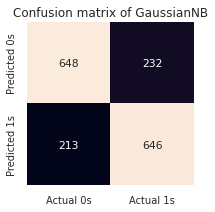

In [ ]:
# Performance Metrics for Gaussian Naive Bayes
precision_NB, recall_NB = getModelReport(model_NB, X_train_nb, y_train, X_test_nb, y_test)

The confusion matrix is drawn for Gaussian Naive Bayes Classifier. The matrix is 2 rows and 2 columns. Columns denote Actual values and rows denote predicted values on target feature.

- Accuracy: The model predicted that 74% passengers transported to alternate dimension.

Different Performance metrics used for classification:

- Precision: 73% of the cases that were accurately predicted actually came true.

- Recall: A recall of 0.75 means that every item from class True was labelled as belonging to class True

#### Prediction on final test set for Naive Bayes Classifier

In [ ]:
#predict labels on test dataset for kaggle
pred_NB = model_NB.predict(test_nb)

In [ ]:
# Prepare .csv file according to kaggle evaluation
final_nb = pd.DataFrame()
final_nb['PassengerId'] = id
final_nb['Transported'] = pred_NB
final_nb.to_csv('submission_nb.csv', index=False)

Kaggle Submission Score for Gaussian NB
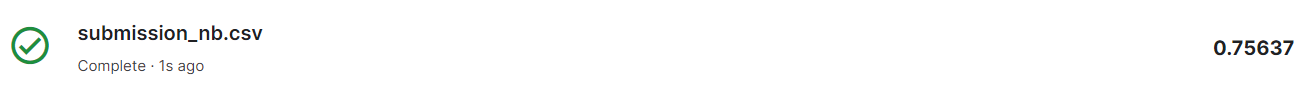

### Logistic Regression

#### Sequential Forward Feature Selection for LR

The forward feature selection for Logistic Regression is carried out using Sequential forward Feature Selection library wrapper from sklearn. It was found that 8 features were selected after performing wrapper method and scoring was kept as accuracy and and cross-validation to 5  while selection of features. The train and test data for LR were separated based on the feature selected by forward feature selection.

In [ ]:
# Object for LR Sequential forward feature selection
lr_sfs = SFS(LogisticRegression(), direction='forward',
            scoring='accuracy',
            cv=5)

# Fit LR Sequential forward Feature Selection on training data
lr_features = lr_sfs.fit(X_train, y_train)

In [ ]:
# Get indices of features selected for LR
lr_feature_indices = lr_features.get_support(indices = True)
X_train_lr = X_train.iloc[ : , lr_feature_indices]
X_test_lr = X_test.iloc[ : , lr_feature_indices]

lr_feature_cols = X_train_lr.columns
print(f'Features selected for LR: {lr_feature_cols}')
test_lr = test_set.iloc[ : , lr_feature_indices]

Features selected for LR: Index(['CryoSleep', 'RoomService', 'FoodCourt', 'Spa', 'VRDeck',
       'HomePlanet_Europa', 'Destination_PSO J318.5-22', 'Side_P'],
      dtype='object')


#### Model Build

The model build process is done with Logistic Regression Classifier. The features generated by forward feature selection for Logistic Regression are used. X_train_lr and X_test_lr dataset are generated considering only the features selected by wrapper and are used for fitting and prediction. The ROC curve plot was drawn for LR which is used to determine how successfully our LR model have distinguished between classes and gave area under the curve(AUC) score of 0.86.

In [ ]:
# LR Model Fitting
model_LR = LogisticRegression().fit(X_train_lr, y_train)

The area under the curve for Logistic Regression:  0.8566249712285603



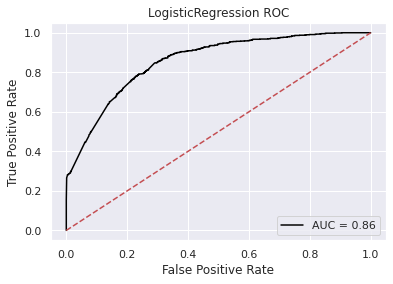

In [ ]:
pred_prob_LR = model_LR.predict_proba(X_test_lr)
auc_score_LR = roc_auc_score(y_test, pred_prob_LR[:,1])
print("The area under the curve for Logistic Regression: ", auc_score_LR, end="\n\n")
plot_ROC_curve(model_LR, y_test, pred_prob_LR[:,1], "black")

******************************
  LogisticRegression
******************************
Accuracy: 0.7734330074755607 
Precision: 0.7915717539863326 
Recall: 0.7671081677704195 

******************************


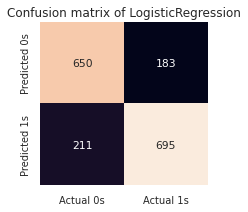

In [ ]:
# Performance Metrics for LR
precision_LR, recall_LR = getModelReport(model_LR, X_train_lr, y_train, X_test_lr, y_test)

The confusion matrix is drawn for Logistic Regression. The matrix is 2 rows and 2 columns. Columns denote Actual values and rows denote predicted values on target feature.

- Accuracy: The model predicted that 77% passengers transported to alternate dimension.

Different Performance metrics used for classification:

- Precision: 79% of the cases that were accurately predicted actually came true.

- Recall: A recall of 0.76 means that every item from class True from "Transported" feature was labelled as belonging to class True

#### Prediction on final test set for LR

In [ ]:
# Predict labels on test dataset for kaggle
pred_LR = model_LR.predict(test_lr)

In [ ]:
# Prepare .csv file according to kaggle evaluation
final_lr = pd.DataFrame()
final_lr['PassengerId'] = id
final_lr['Transported'] = pred_LR
final_lr.to_csv('submission_lr.csv', index=False)

Kaggle Submission for LR
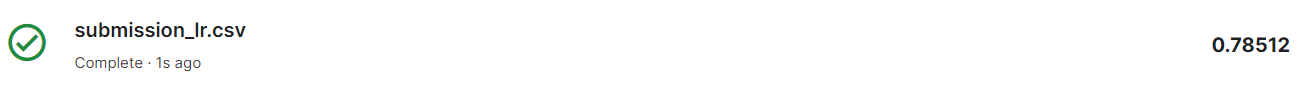

# IV. Interpretations and Comparison

## Number of features

In [ ]:
# Number of features used for each method
feature_dataframe = pd.DataFrame({
    model_LDA.__class__.__name__: lda_feature_cols,
    model_NB.__class__.__name__: nb_feature_cols,
    model_LR.__class__.__name__: lr_feature_cols,
})
print("Table shows features selected for each method after performing Sequential Forward Feature Selection:")
feature_dataframe

Table shows features selected for each method after performing Sequential Forward Feature Selection:


,LinearDiscriminantAnalysis,GaussianNB,LogisticRegression
0,CryoSleep,CryoSleep,CryoSleep
1,RoomService,Age,RoomService
2,FoodCourt,RoomService,FoodCourt
3,ShoppingMall,FoodCourt,Spa
4,Spa,ShoppingMall,VRDeck
5,VRDeck,HomePlanet_Mars,HomePlanet_Europa
6,HomePlanet_Europa,Destination_PSO J318.5-22,Destination_PSO J318.5-22
7,Destination_TRAPPIST-1e,Side_P,Side_P


We discovered that 8 features are chosen for each of the three ways after doing Sequential Forward Feature Selection on each method to determine the best predictors for model fitting.
Out of those 8, three features—"CryoSleep," "RoomService," and "FoodCourt"—are shared by all three approaches. In both linear discriminant analysis and logistic regression, there are 6 features that are shared. We also discovered that the Gaussian Naive Bayes and the Logistic Regression share 5 features. The Gaussian Naive Bayes and the Linear Discriminant Analysis appear to have four features.
```
Expense features - RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
```
Three of the five expense features are selected in the Gaussian Naive Bayes approach, four are selected in the Logistic Regression method, and all five are selected in the LDA method. This suggests that the expense features play an important role in each method to help predict whether a passenger was transported.


## Model coefficients

In [ ]:
# Method for Model Feature Coefficients
def model_coeffients(model, feature_cols, X_train):
  coeff = pd.Series(index=feature_cols, data=model.coef_[0])
  arrange_coeff = coeff.sort_values(ascending=False).index.tolist()
  print(f'----- Coefficients in {model.__class__.__name__} -------')
  print(coeff[arrange_coeff])

The coefficients in Linear Discriminant Analysis shows that CryoSleep(2.42) and HomePlanet_Europa(1.25) tend to have larger impact on the LDA model, whereas RoomService, VRDeck, and Spa tend to show a less impact. . The possibility of being transported remains high for passenger who spends in FoodCourt(0.43) compared to a passenger who spends in Shopping Mall(0.31). It also can be said that a unit increase in Spa(-0.60) expenditure results in a greater reduction in possibility of being transported to alternate dimension compared to a unit increase in ShoopingMall(0.31).

In [ ]:
# Model Feature Coefficients for LDA
model_coeffients(model_LDA, lda_feature_cols, X_train_lda)

----- Coefficients in LinearDiscriminantAnalysis -------
CryoSleep                  2.427292
HomePlanet_Europa          1.258297
FoodCourt                  0.439947
ShoppingMall               0.310629
Destination_TRAPPIST-1e   -0.149833
RoomService               -0.395099
VRDeck                    -0.558716
Spa                       -0.606838
dtype: float64


The coefficients in Logistic Regression model shows that HomePlanet_Europa(2.01) and CryoSleep(1.2) tend to have larger impact on the LR model which is similar to LDA model. Also, RoomService, VRDeck and Spa tend to show less impact on the LR model. The chance of being transported to alternate dimension remains high if we spend more in FoodCourt(0.76) compared to other luxury amenities such as Spa(-2.25), VRDeck(-2.16) and RoomService(-0.86). It can be said that a unit increase in Spa expenditure results in a greater reduction in possibility of being transported to alternate dimension compared to a unit increase in FoodCourt.

In [ ]:
# Model Feature Coefficients for LR
model_coeffients(model_LR, lr_feature_cols, X_train_lr)

----- Coefficients in LogisticRegression -------
HomePlanet_Europa            2.017389
CryoSleep                    1.200000
FoodCourt                    0.763610
Destination_PSO J318.5-22   -0.235862
Side_P                      -0.538850
RoomService                 -0.869323
VRDeck                      -2.161929
Spa                         -2.256527
dtype: float64


## Classification Performance Metrices

AUC and Precision scores for the Logistic Regression model are higher than those for the Linear Discriminant Analysis model and the Gaussian Naive Bayes model which clearly shows LR model has performed effective. Although the LDA model had a better Recall score of 0.79, which shows the proportion of real positive cases that LDA model was able to properly anticipate, the LR model showed decent score of 0.76 Recall, which was higher than the Gaussian Naive Bayes model's score of 0.75.

In [ ]:
# Table showing AUC, precision, recall for all three models
feature_d = pd.DataFrame({
    "Metric": ["AUC", "Precision", "Recall"],
    model_LDA.__class__.__name__: [auc_score_LDA, precision_LDA, recall_LDA],
    model_NB.__class__.__name__: [auc_score_NB, precision_NB, recall_NB],
    model_LR.__class__.__name__: [auc_score_LR, precision_LR, recall_LR],
})
feature_d

,Metric,LinearDiscriminantAnalysis,GaussianNB,LogisticRegression
0,AUC,0.842606,0.797255,0.856625
1,Precision,0.700456,0.735763,0.791572
2,Recall,0.798701,0.752037,0.767108


## Conclusion



With a score of 0.78512 on Kaggle, the Logistic Regression model appears to have outperformed the Linear Discriminant Analysis and Gaussian Naive Bayes models for binary classification. LR model has proved effective due to the fact that it doesn't make any assumptions while distribution of independent variables. The LDA model also has done better with score of 0.76128 as compared to Gaussian Naive Bayes. Although, maybe we think that further analysis can be done using backward feature selection to check if the score for each model can be improved.

# V. References

- Sequential Feature Selector: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html

- Linear Discriminant Analysis: https://www.analyticsvidhya.com/blog/2021/08/a-brief-introduction-to-linear-discriminant-analysis/

- Gaussian Naive Bayes: https://iq.opengenus.org/gaussian-naive-bayes/

- Logistic Regression: https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc

- Train Test Split: https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

- ROC Curve and AUC: https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc#:~:text=AUC%20

- Precison and Recall: https://en.wikipedia.org/wiki/Precision_and_recall#:~:text=In%20a%20classification%20task%2C%20the,false%20positives%2C%20which%20are%20items

- Classification Performance: https://towardsdatascience.com/8-metrics-to-measure-classification-performance-984d9d7fd7aa